<a href="https://colab.research.google.com/github/Josogrephy/Auction/blob/master/ML_wine_unsuperviselearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
df=pd.read_csv('/content/wine.data',header=None)


In [ ]:
## Clean Data
df.columns =['wine','alcohol','malicAcid','ash','ashalcalinity','magnesium','totalPhenols','flavanoids','nonFlavanoidPhenols','proanthocyanins','colorIntensity','hue','od280_od315','proline']
df.describe()
df.isnull().sum()
# no null!! Much Woah!

wine                   0
alcohol                0
malicAcid              0
ash                    0
ashalcalinity          0
magnesium              0
totalPhenols           0
flavanoids             0
nonFlavanoidPhenols    0
proanthocyanins        0
colorIntensity         0
hue                    0
od280_od315            0
proline                0
dtype: int64

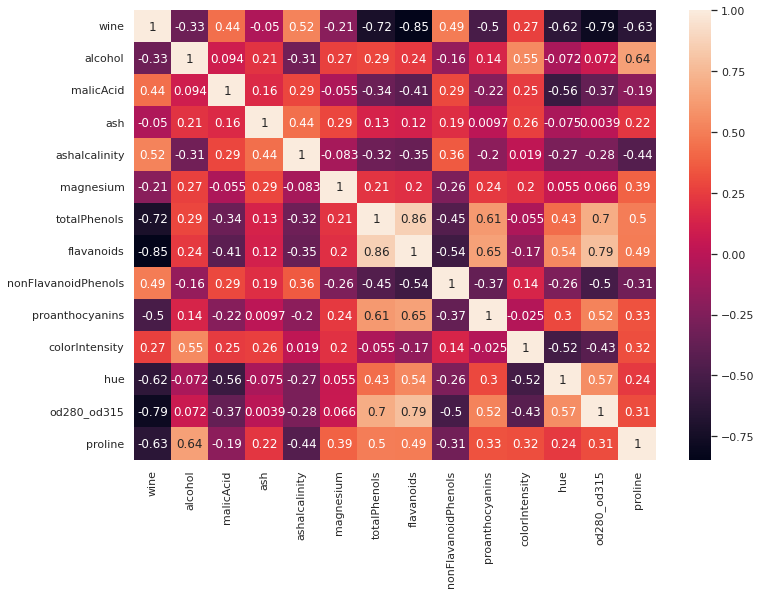

In [ ]:
## Heatmap to check for correlation
import seaborn as sns
corr = df[df.columns].corr()
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(corr, annot = True)

In [ ]:
## Get label and drop label
# We can prob drop ash as well as it doesn't look like there is any corr
wineLabel=df.iloc[:,:1]
wineData = df.drop(['wine','ash','colorIntensity'], axis=1)
wineData.describe()



,alcohol,malicAcid,ashalcalinity,magnesium,totalPhenols,flavanoids,nonFlavanoidPhenols,proanthocyanins,hue,od280_od315,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,0.957449,2.611685,746.893258
std,0.811827,1.117146,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,0.228572,0.709990,314.907474
min,11.030000,0.740000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,1.120000,3.170000,985.000000
max,14.830000,5.800000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,1.710000,4.000000,1680.000000


In [ ]:
## standardize data
from sklearn.preprocessing import StandardScaler

# Standardizing the features
wineData = StandardScaler().fit_transform(wineData)

In [ ]:
## PCA to 2 component
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
wineComponents = pca.fit_transform(wineData)
wineDf = pd.DataFrame(data = wineComponents, columns = ['wine component 1', 'wine component 2'])

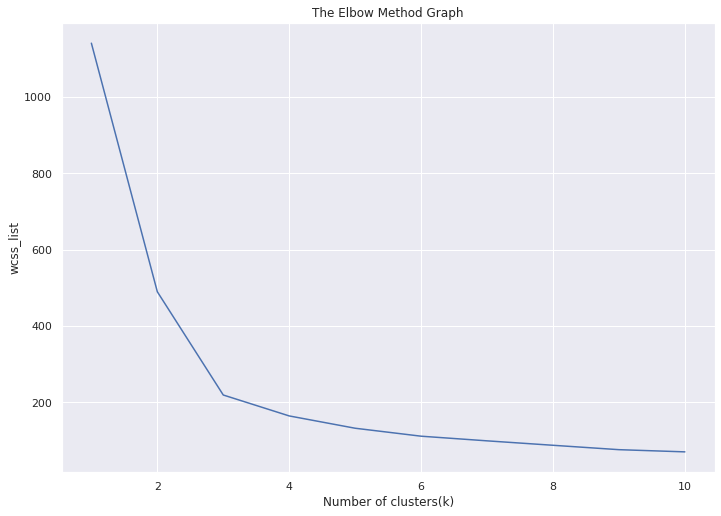

In [ ]:

## Kmeans clustering
# Finding optimal number of clusters using the elbow method  
from sklearn.cluster import KMeans 
import matplotlib.pyplot as mpl 
wcss_list= []  
# Initializing the list for the values of WCSS  
  
# Using for loop for iterations from 1 to 10. We want to find the number of cluster that works the best 
for i in range(1, 11):  
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)  
    kmeans.fit(wineDf)
    wcss_list.append(kmeans.inertia_)  
mpl.plot(range(1, 11), wcss_list)  
mpl.title('The Elbow Method Graph')  
mpl.xlabel('Number of clusters(k)')  
mpl.ylabel('wcss_list')  
mpl.show()  
# Seems like 3 clusters is the best using the Elbow Graph

In [ ]:
## Visualize of kmeans
import matplotlib.pyplot as plt
import matplotlib.patches as ptch
y_pred = KMeans(n_clusters=3, init='k-means++', random_state= 42).fit_predict(wineDf)
print(y_pred)


[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 1 0 2 1 2 0 0 1
 1 0 0 2 1 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


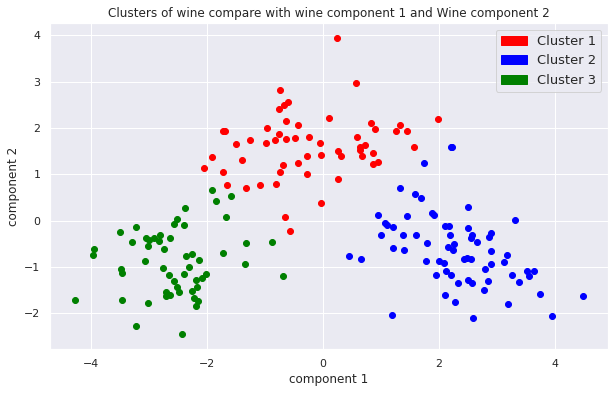

In [ ]:

# Visualization of cluster
wineDfValues = wineDf.values
plt.figure(figsize=(10,6))
red_patch= ptch.Patch(color="red", label="Cluster 1")
blue_patch= ptch.Patch(color="blue", label="Cluster 2")
green_patch= ptch.Patch(color="green", label="Cluster 3")
plt.legend(handles=[red_patch, blue_patch, green_patch], loc=1, prop={'size': 13})
plt.title('Clusters of wine compare with wine component 1 and Wine component 2')
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.scatter(wineDfValues[y_pred == 0, 0], wineDfValues[y_pred == 0, 1], c = 'red')
plt.scatter(wineDfValues[y_pred == 1, 0], wineDfValues[y_pred == 1, 1], c = 'blue')
plt.scatter(wineDfValues[y_pred == 2, 0], wineDfValues[y_pred == 2, 1], c = 'green')

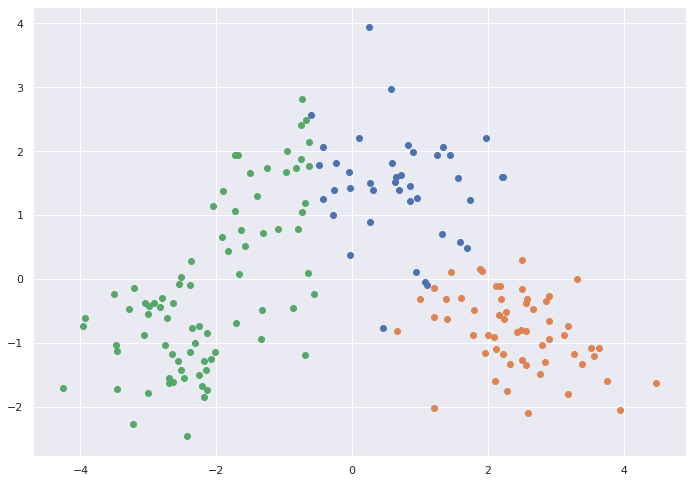

In [ ]:
##2nd clustering method: Meanshift
# mean shift clustering
from numpy import unique
from numpy import where
from sklearn.cluster import MeanShift
from matplotlib import pyplot
# define the model
model = MeanShift()
# fit model and predict clusters
yhat = model.fit_predict(wineDfValues)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples
	pyplot.scatter(wineDfValues[row_ix, 0], wineDfValues[row_ix, 1])
# show the plot
pyplot.show()